In [31]:
# Importing the necessary libraries
import warnings
import random
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)
warnings.filterwarnings("ignore")
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.neighbors import NearestNeighbors
from scipy.sparse import csr_matrix
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

In [32]:
# Read the dataset
ratings = pd.read_csv("https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Dataset/ratings.csv")
org_movies = pd.read_csv("https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Dataset/movies.csv")
tmdb = pd.read_csv("https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Preprocessing%20code/TMDB%20data.csv")
imdb = pd.read_csv("https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Preprocessing%20code/IMDB%20data.csv")

In [33]:
ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [34]:
tmdb

,movieId,imdbId,tmdbId,user_score,language,budget,revenue
0,1,114709,862.0,80.0,English,30000000.0,394400000.0
1,2,113497,8844.0,72.0,English,65000000.0,262821940.0
2,3,113228,15602.0,65.0,English,25000000.0,71500000.0
3,4,114885,31357.0,63.0,English,16000000.0,81452156.0
4,5,113041,11862.0,63.0,English,NaN,76594107.0
...,...,...,...,...,...,...,...
9737,193581,5476944,432131.0,77.0,Japanese,NaN,NaN
9738,193583,5914996,445030.0,78.0,Japanese,NaN,6000000.0
9739,193585,6397426,479308.0,68.0,English,NaN,NaN
9740,193587,8391976,483455.0,82.0,Japanese,NaN,NaN


In [35]:
org_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [36]:
imdb

,movieId,imdbId,tmdbId,Ratings,Popularity,User Reviews,Critic Reviews,Metascore
0,1,114709,862.0,8.3,787.0,789.0,170.0,96.0
1,2,113497,8844.0,7.1,568.0,333.0,78.0,39.0
2,3,113228,15602.0,6.6,NaN,71.0,26.0,46.0
3,4,114885,31357.0,6.0,NaN,65.0,19.0,NaN
4,5,113041,11862.0,6.1,NaN,83.0,33.0,49.0
...,...,...,...,...,...,...,...,...
9737,193581,5476944,432131.0,7.6,NaN,10.0,5.0,NaN
9738,193583,5914996,445030.0,7.3,NaN,29.0,5.0,NaN
9739,193585,6397426,479308.0,6.2,NaN,4.0,8.0,NaN
9740,193587,8391976,483455.0,7.3,NaN,14.0,3.0,NaN


### Handling missing values

In [37]:
ratings.isnull().sum()

userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

In [38]:
org_movies.isnull().sum()

movieId    0
title      0
genres     0
dtype: int64

In [39]:
tmdb.isnull().sum()

movieId          0
imdbId           0
tmdbId           8
user_score     152
language       149
budget        3709
revenue       3251
dtype: int64

In [40]:
imdb.isnull().sum()

movieId              0
imdbId               0
tmdbId               8
Ratings             13
Popularity        6631
User Reviews        65
Critic Reviews     175
Metascore         2799
dtype: int64

In [41]:
# Drop the unnecessary columns, budget and revenue are dropped due to major part of the dataset missing it
tmdb=tmdb.drop(["tmdbId","imdbId", "budget", "revenue"],axis=1)

# Fill user_score column with the average value when it is null
average_user_score = tmdb['user_score'].mean()
tmdb['user_score'].fillna(average_user_score, inplace=True)

# Fill language column with 'English'
tmdb['language'].fillna('English', inplace=True)
tmdb.isnull().sum()

movieId       0
user_score    0
language      0
dtype: int64

In [42]:
# Drop the unnecessary columns, popularity and metascore are dropped due to major part of the dataset missing it
imdb=imdb.drop(["imdbId","tmdbId","Popularity","Metascore"],axis=1)

# Fill the missing value in column with the average value when it is null
imdb['User Reviews'].fillna(imdb['User Reviews'].mean(), inplace=True)
imdb['Critic Reviews'].fillna(imdb['Critic Reviews'].mean(), inplace=True)
imdb['Ratings'].fillna(imdb['Ratings'].mean(), inplace=True)
imdb.isnull().sum()

movieId           0
Ratings           0
User Reviews      0
Critic Reviews    0
dtype: int64

### Dataset modification

In [43]:
# Split genres and create new columns
genres = ['Action', 'Adventure', 'Animation', "Children", 'Comedy', 'Crime', 'Documentary', 'Drama',
          'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western', '(no genres listed)']

movies = org_movies.copy()
for genre in genres:
    movies[genre] = movies['genres'].apply(lambda x: 1 if genre in x.split('|') else 0)

movies.drop(columns=['genres'], inplace=True)
movies

,movieId,title,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,(no genres listed)
0,1,Toy Story (1995),0,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,Jumanji (1995),0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3,Grumpier Old Men (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,Waiting to Exhale (1995),0,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,5,Father of the Bride Part II (1995),0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),1,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9738,193583,No Game No Life: Zero (2017),0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,193585,Flint (2017),0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9740,193587,Bungo Stray Dogs: Dead Apple (2018),1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Merge the DataFrames on 'movieId'
merged_tmdb = pd.merge(movies, tmdb, on='movieId', how='inner')
merged_df = pd.merge(merged_tmdb, imdb, on='movieId', how='inner')
final_df = ratings.merge(merged_df,on='movieId', how='left')
final_df

,userId,movieId,rating,timestamp,title,Action,Adventure,Animation,Children,Comedy,...,Sci-Fi,Thriller,War,Western,(no genres listed),user_score,language,Ratings,User Reviews,Critic Reviews
0,1,1,4.0,964982703,Toy Story (1995),0,1,1,1,1,...,0,0,0,0,0,80.0,English,8.3,789.0,170.0
1,1,3,4.0,964981247,Grumpier Old Men (1995),0,0,0,0,1,...,0,0,0,0,0,65.0,English,6.6,71.0,26.0
2,1,6,4.0,964982224,Heat (1995),1,0,0,0,0,...,0,1,0,0,0,79.0,English,8.3,1300.0,205.0
3,1,47,5.0,964983815,Seven (a.k.a. Se7en) (1995),0,0,0,0,0,...,0,1,0,0,0,84.0,English,8.6,1900.0,162.0
4,1,50,5.0,964982931,"Usual Suspects, The (1995)",0,0,0,0,0,...,0,1,0,0,0,82.0,English,8.5,1500.0,147.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100831,610,166534,4.0,1493848402,Split (2017),0,0,0,0,0,...,0,1,0,0,0,73.0,English,7.3,1100.0,573.0
100832,610,168248,5.0,1493850091,John Wick: Chapter Two (2017),1,0,0,0,0,...,0,1,0,0,0,73.0,English,7.4,1000.0,500.0
100833,610,168250,5.0,1494273047,Get Out (2017),0,0,0,0,0,...,0,0,0,0,0,76.0,English,7.8,2000.0,441.0
100834,610,168252,5.0,1493846352,Logan (2017),1,0,0,0,0,...,1,0,0,0,0,78.0,English,8.1,1700.0,650.0


### Exploratory Data Analysis

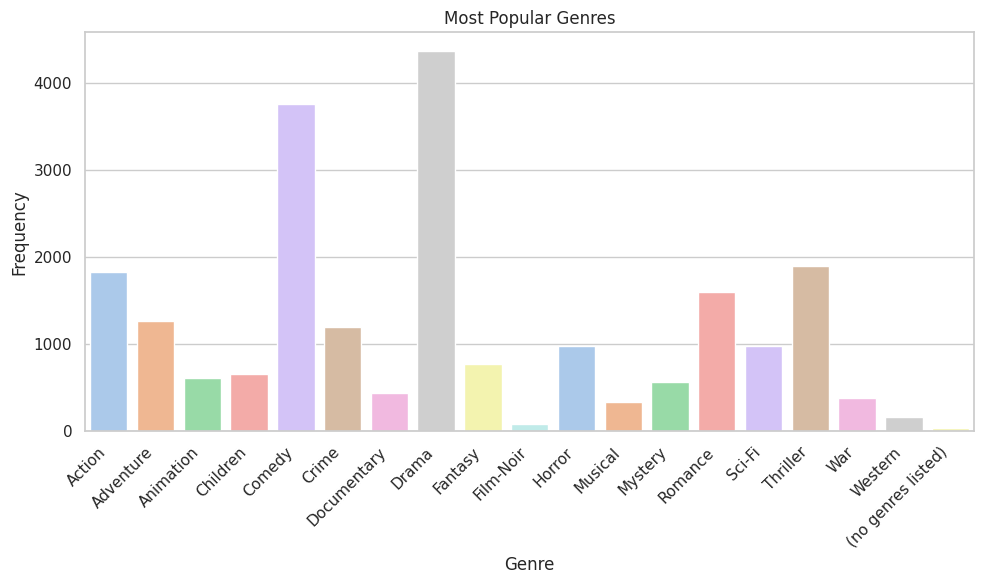

In [45]:
# Store the frequency of each genre in dictionary
dict = {}
for genre in genres:
    dict[genre] = merged_df[genre].sum()

genres1 = pd.DataFrame(list(dict.items()), columns=['Genre', 'Frequency'])

# Plot the graph for Frequency V/S Genre
sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel")
plt.figure(figsize=(10, 6))
sns.barplot(x='Genre', y='Frequency', data=genres1, palette=palette)
plt.title('Most Popular Genres')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

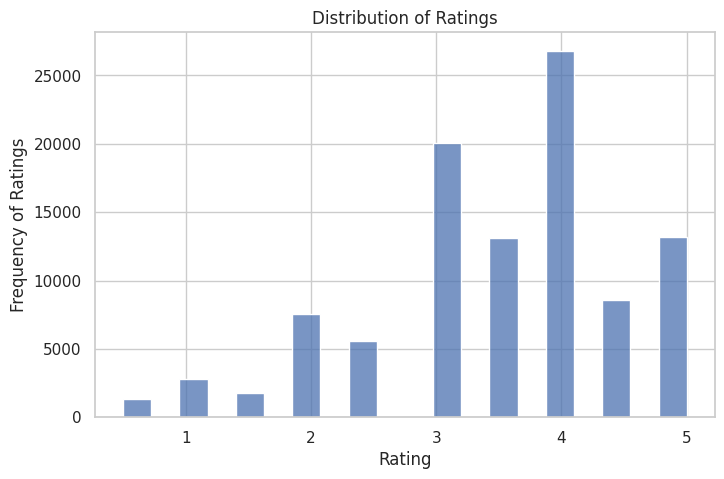

In [46]:
# Plotting distribution of ratings
sns.set_theme(style="whitegrid")
palette = sns.color_palette("pastel")
plt.figure(figsize=(8, 5))
sns.histplot(ratings['rating'], bins=20, kde=False, palette = palette)
plt.xlabel('Rating')
plt.ylabel('Frequency of Ratings')
plt.xticks()
plt.title('Distribution of Ratings')
plt.show()

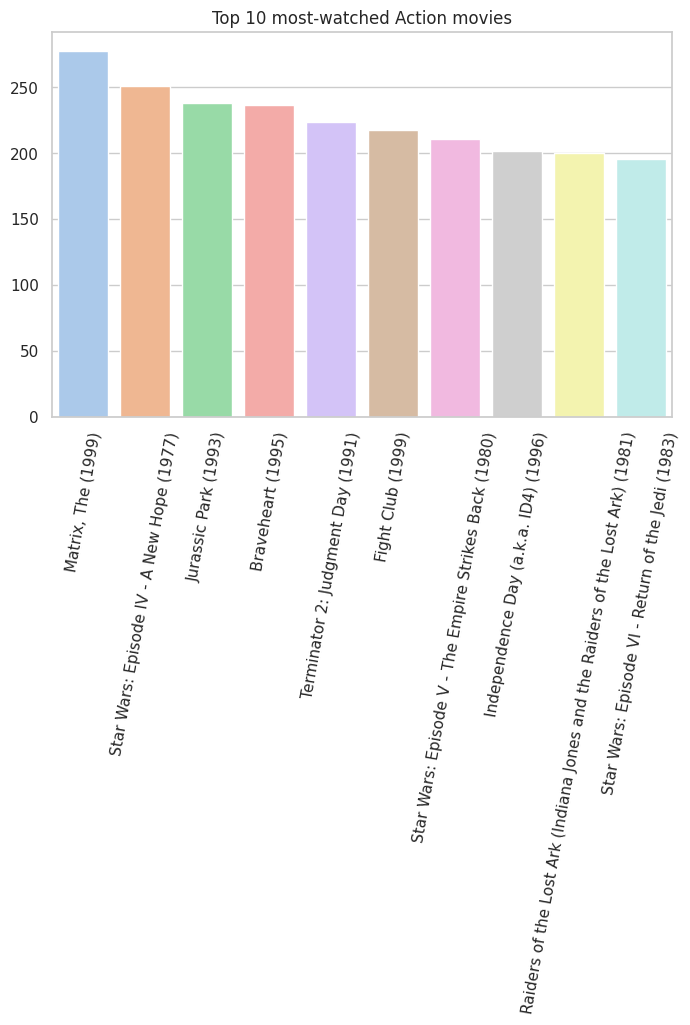

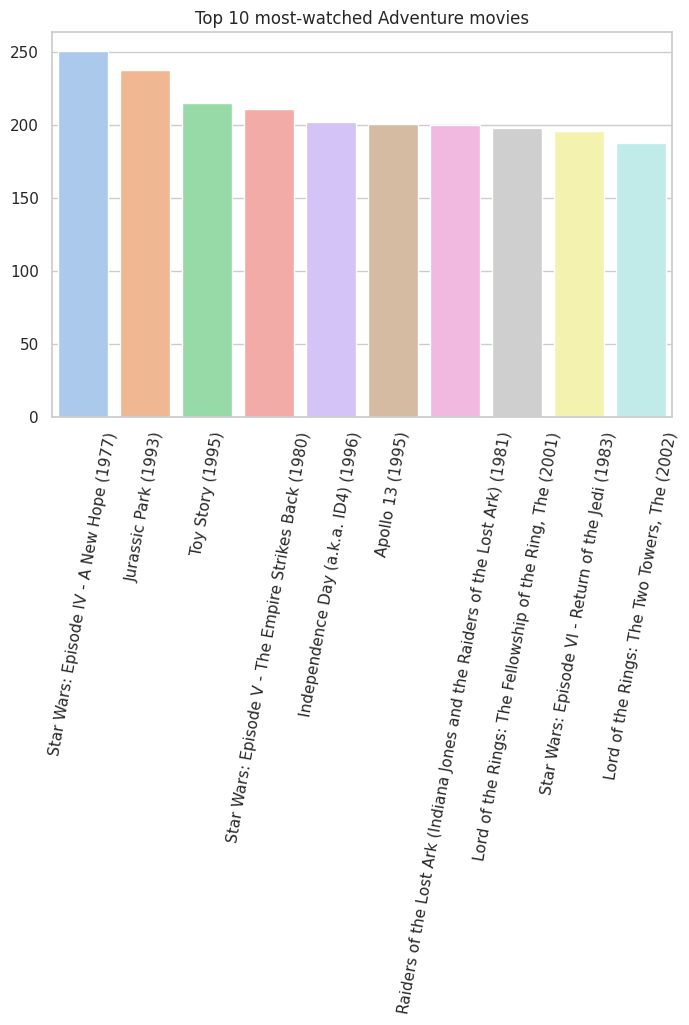

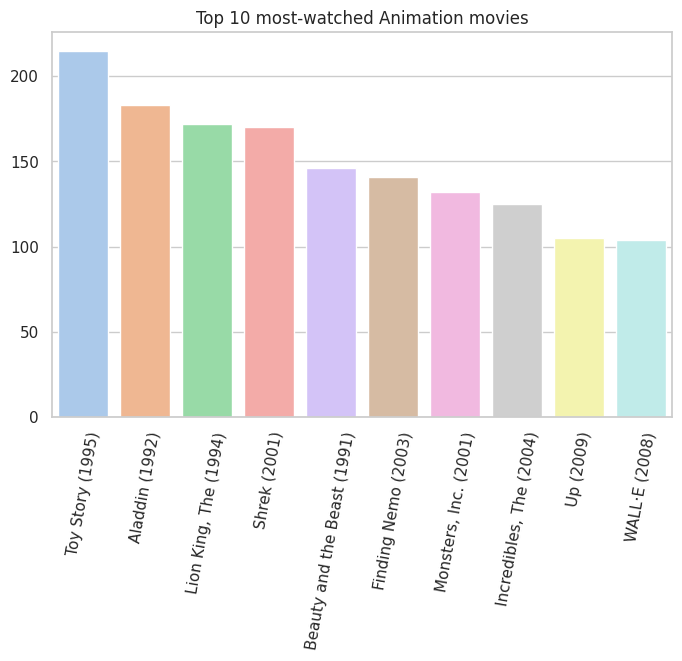

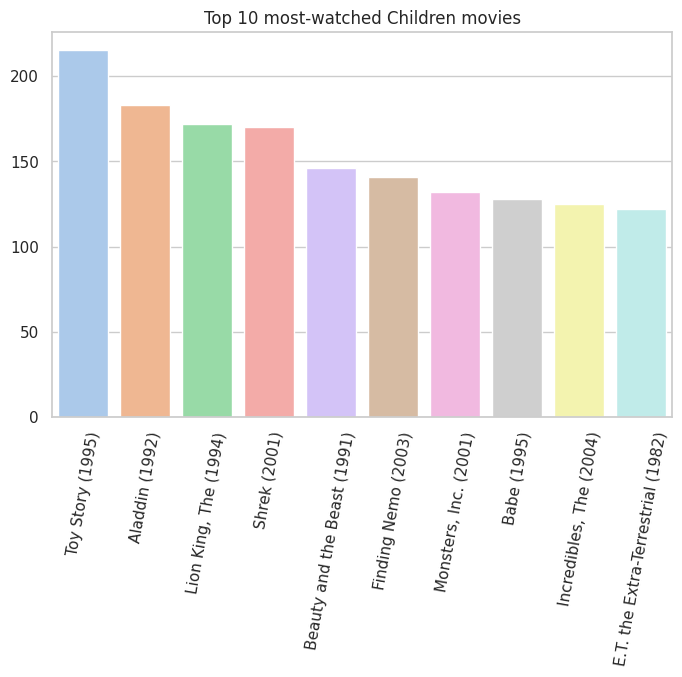

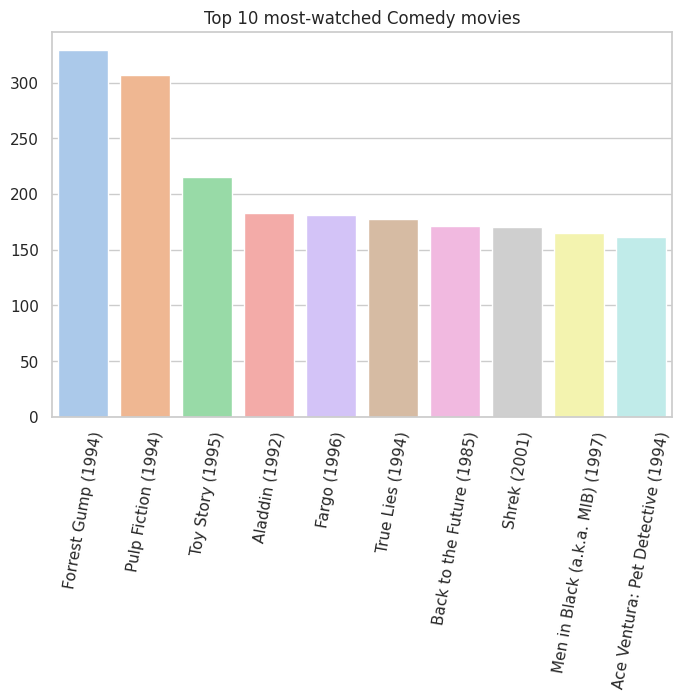

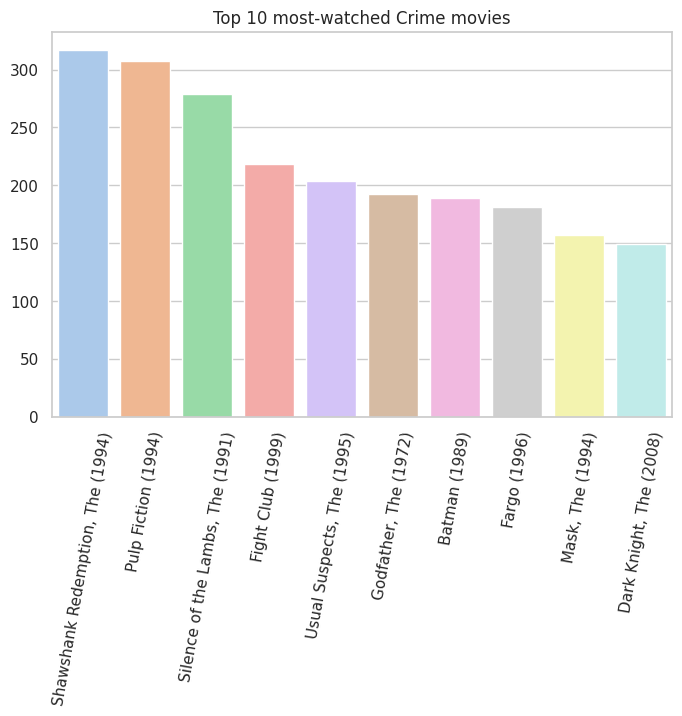

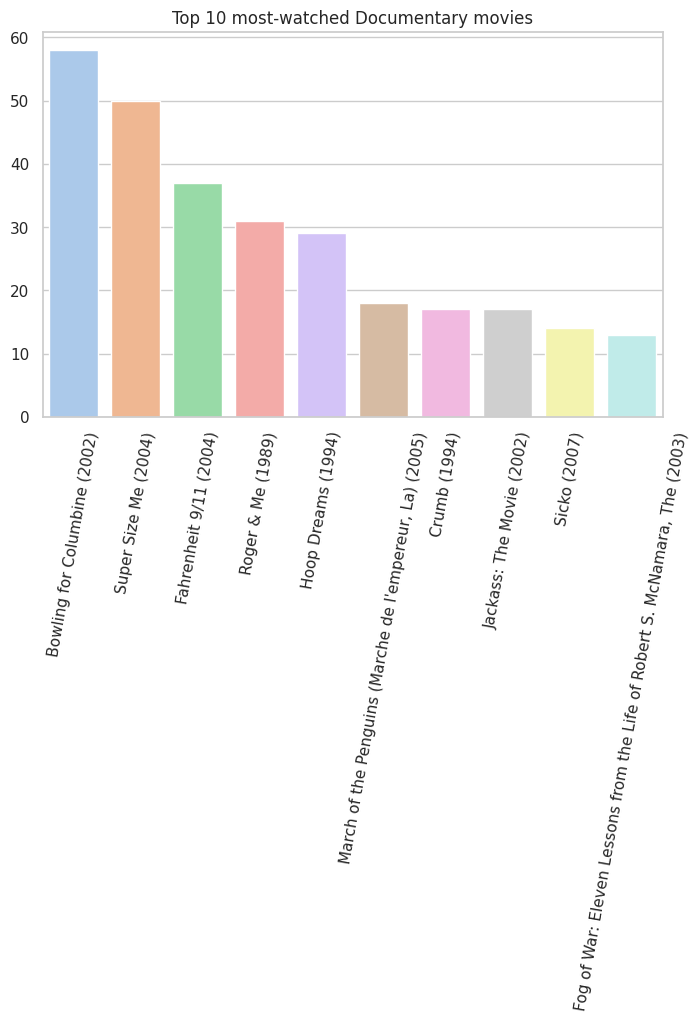

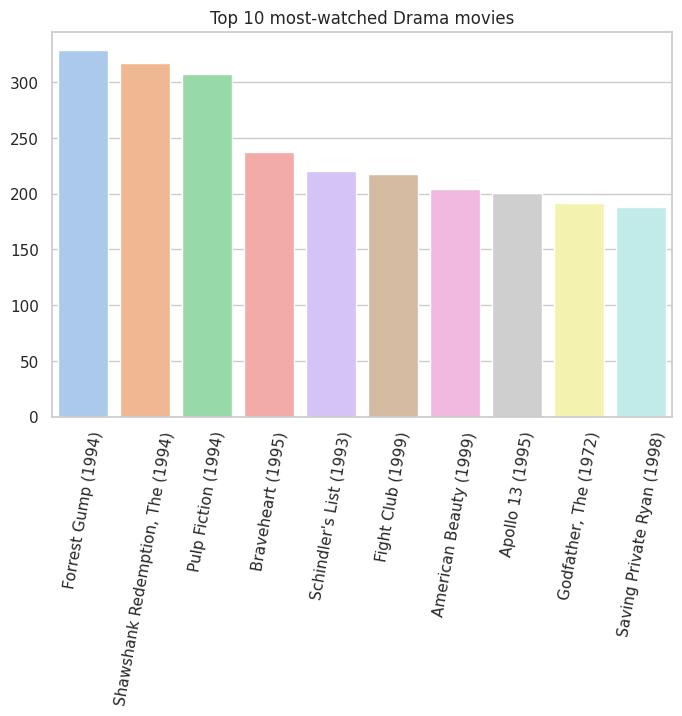

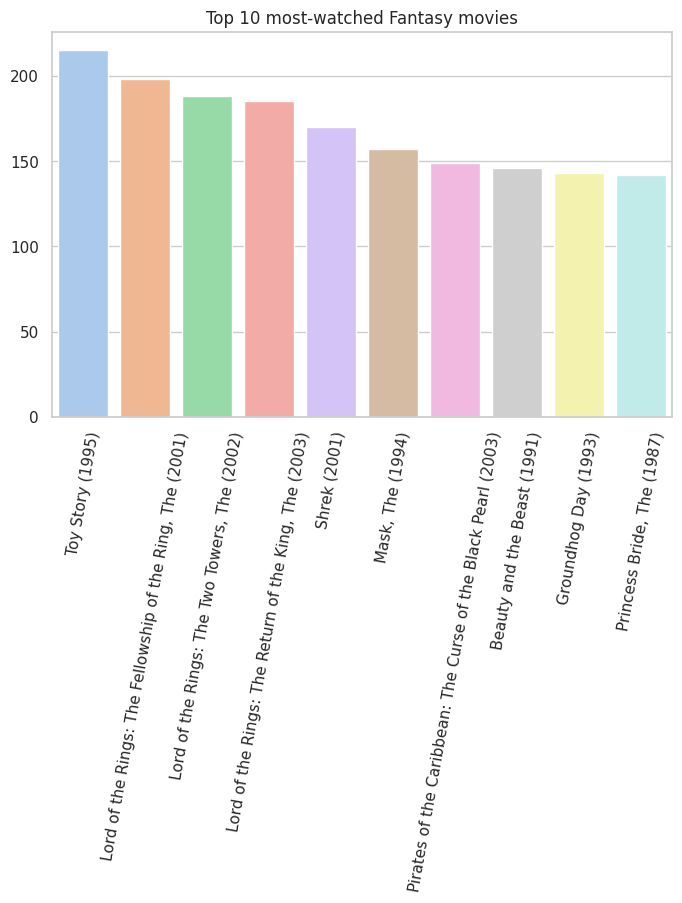

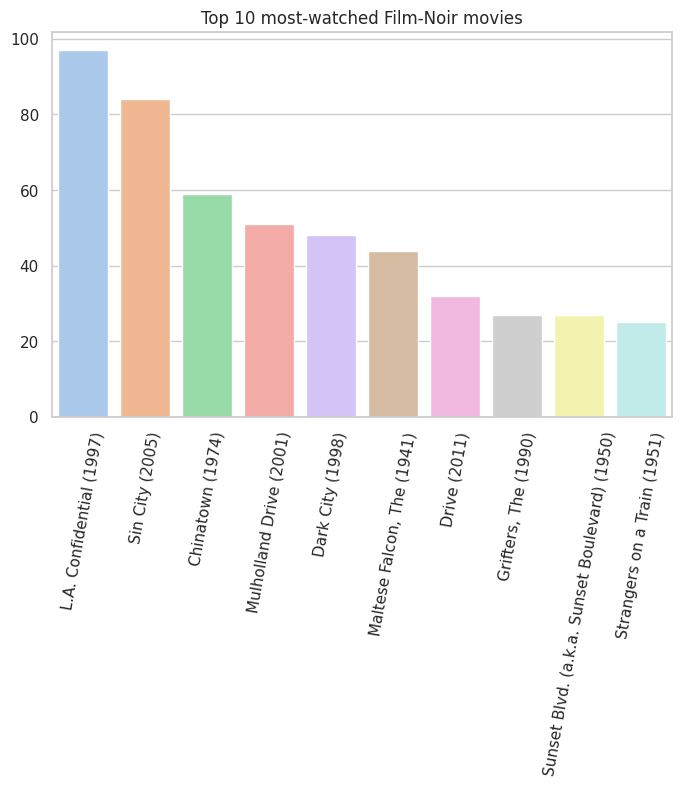

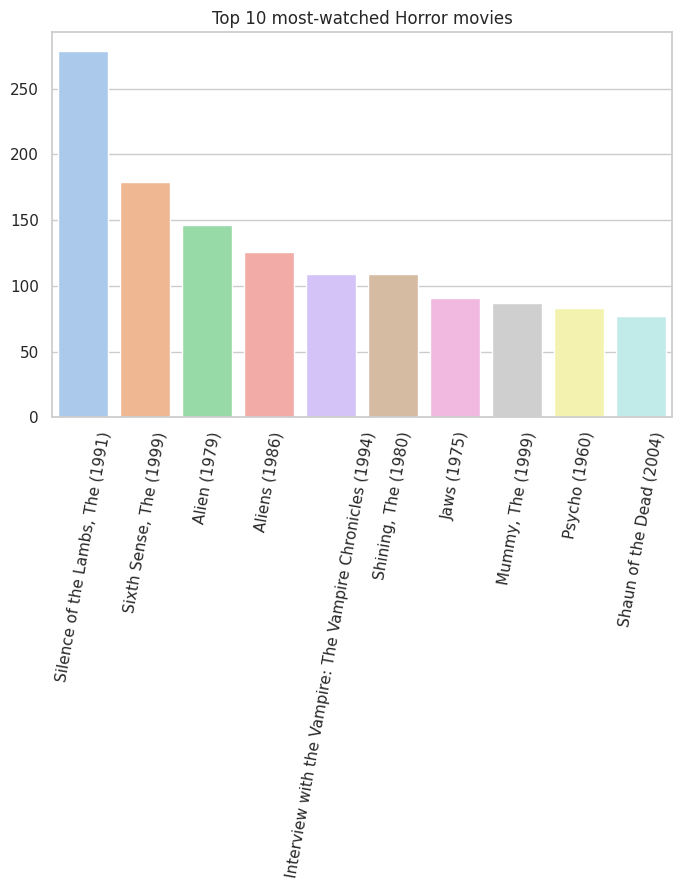

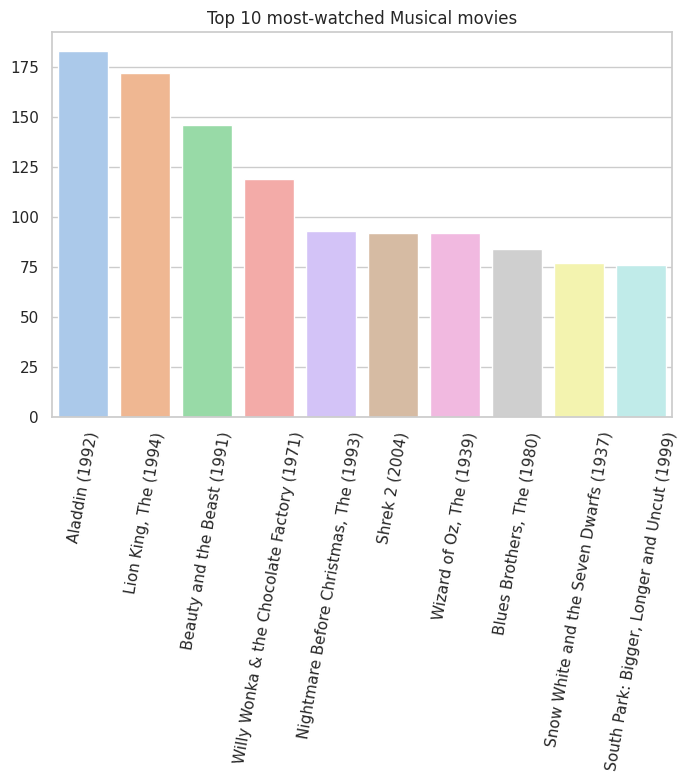

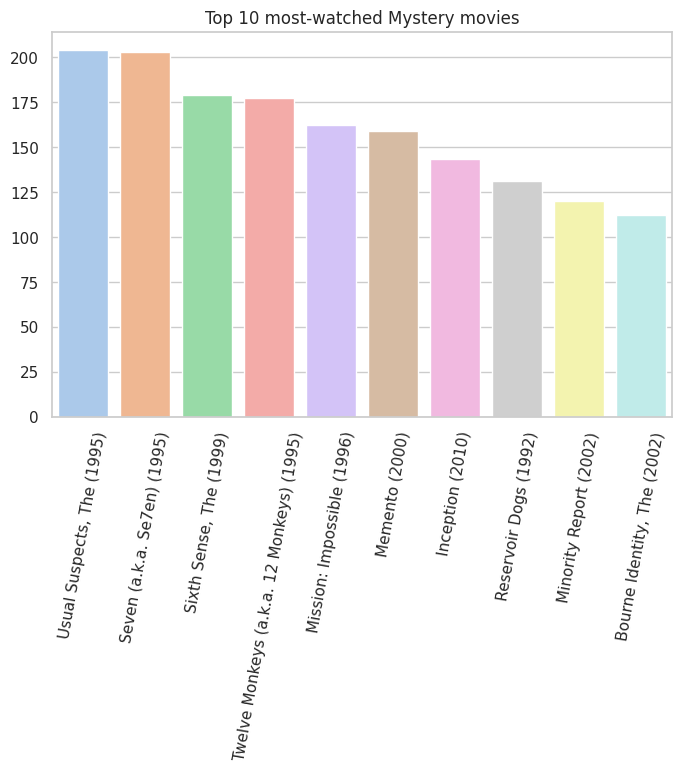

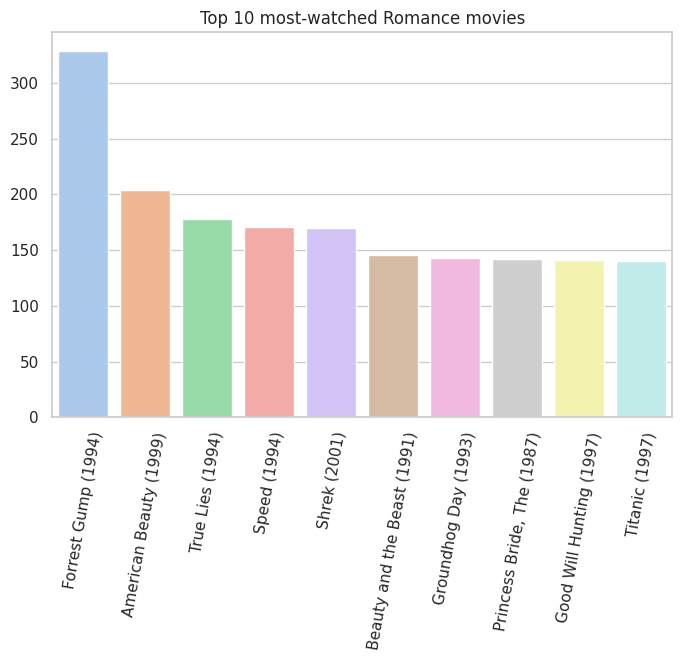

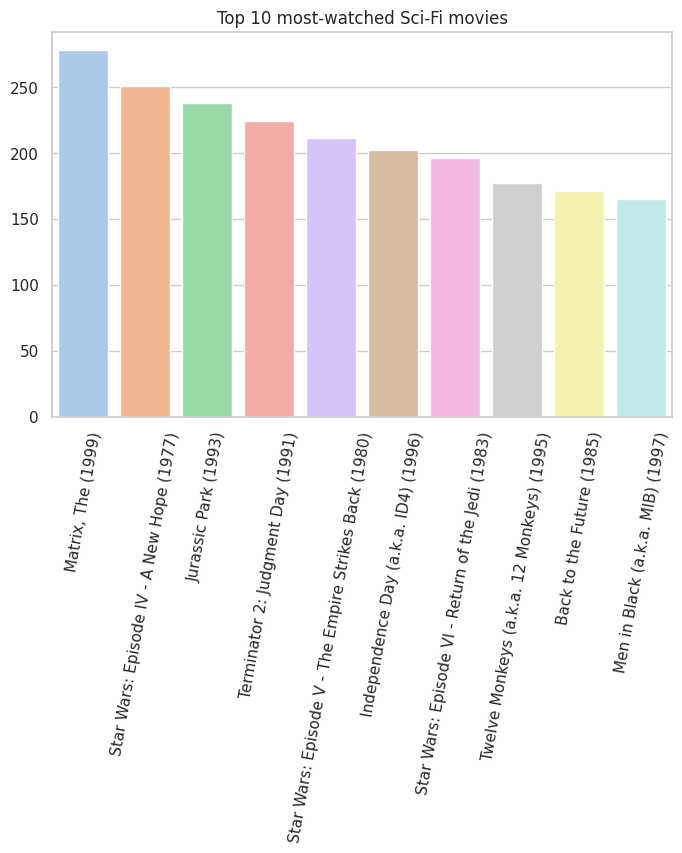

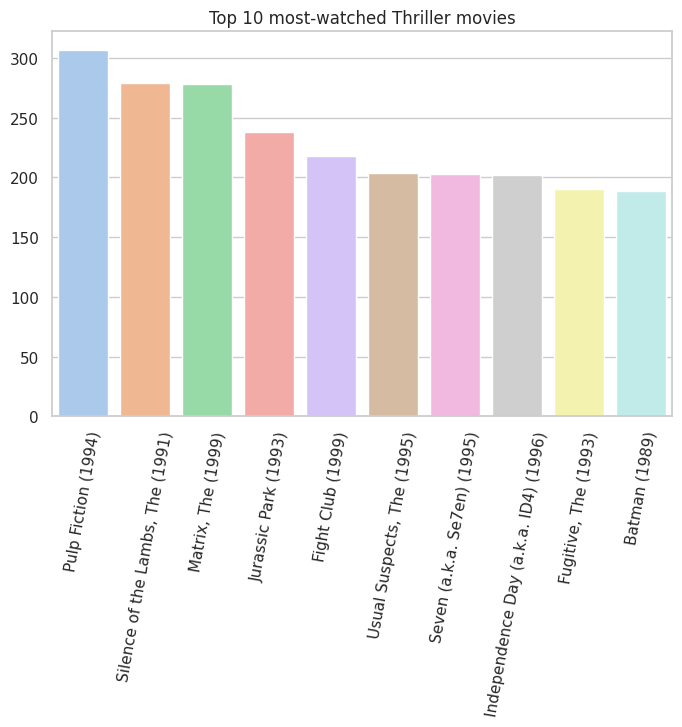

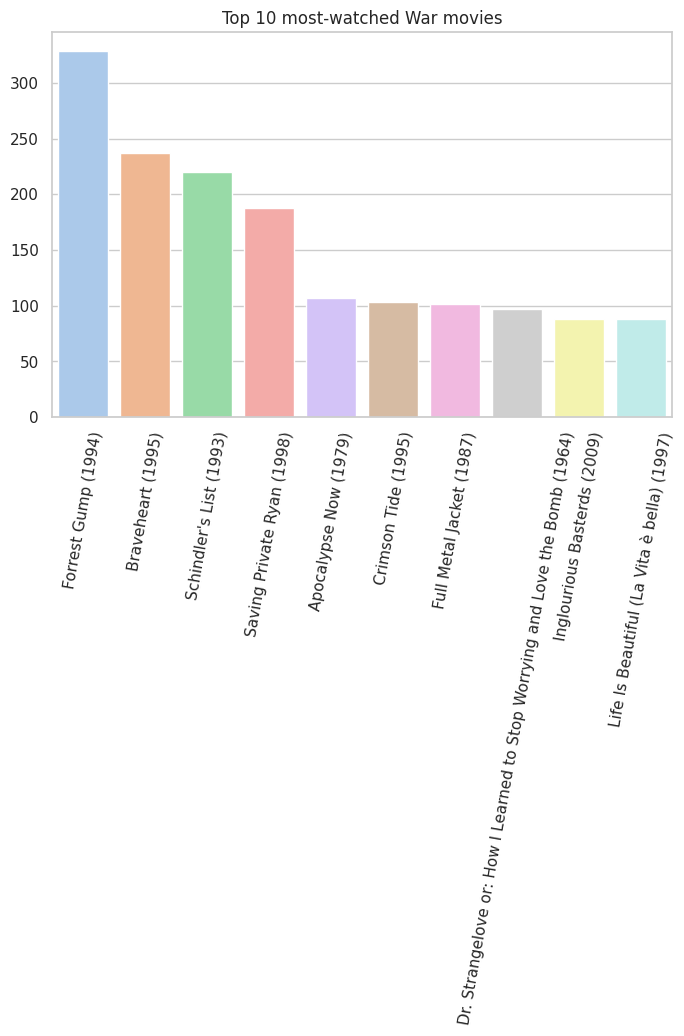

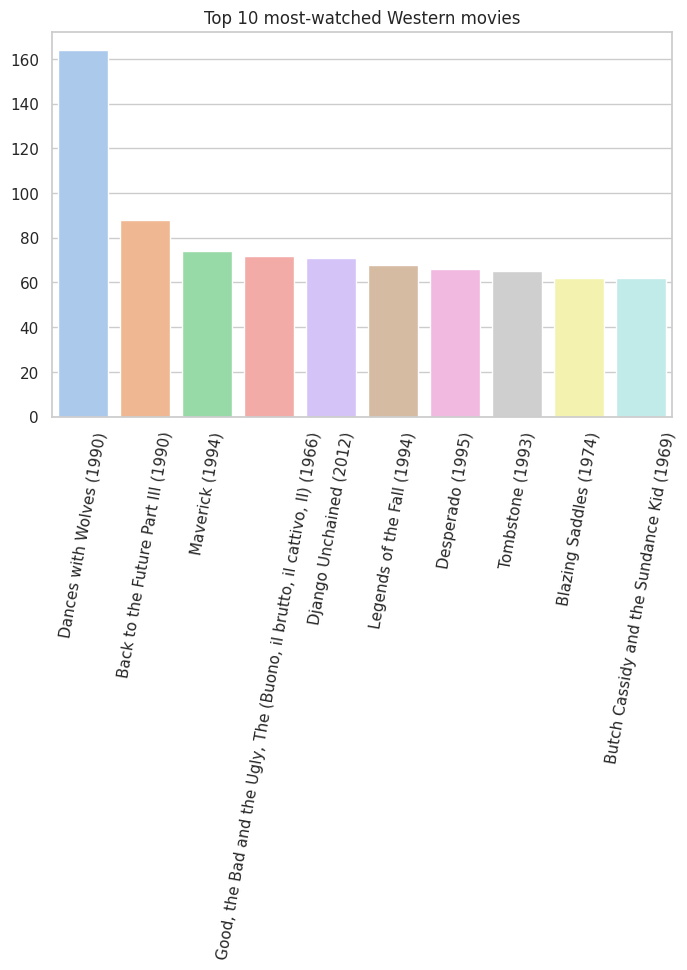

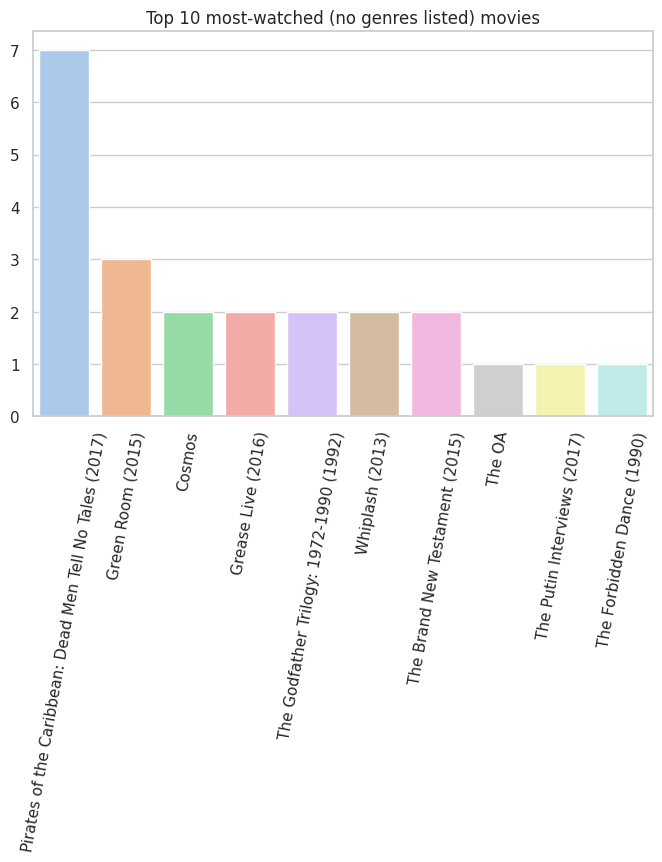

In [47]:
matrix = final_df.drop(['userId','rating', 'timestamp','user_score', 'movieId', "language" , "Critic Reviews",'Ratings','User Reviews'], axis=1)

for gen in matrix.columns[1:]:
    x = final_df[(final_df[gen]==True)]
    sns.set_theme(style="whitegrid")
    palette = sns.color_palette("pastel")
    plt.figure(figsize=(8, 5))
    topmovies = x.groupby('title').size().sort_values(ascending=False).head(10)
    sns.barplot(x=topmovies.index, y=topmovies.values, palette = palette)
    plt.title('Top 10 most-watched '+gen+' movies')
    plt.xticks(rotation=80)
    plt.xlabel('')
    plt.show()

### Model 1 : Collaborative filtering using KNN:
* User based
 - General
 - Genre based
* Item based

#### User based

In [48]:
# Create a movie - user matrix based on ratings given by user
ratings_ = pd.merge(ratings, org_movies, how='inner', on='movieId')
movies_user_matrix = ratings_.pivot_table(index='title',columns='userId',values='rating').fillna(0)
movies_user_matrix_copy = movies_user_matrix.copy()
movies_user_matrix

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
title,,,,,,,,,,,,,,,,,,,,,
'71 (2014),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0
'Hellboy': The Seeds of Creation (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Round Midnight (1986),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Salem's Lot (2004),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
'Til There Was You (1997),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
eXistenZ (1999),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,5.0,0.0,0.0,0.0,0.0,4.5,0.0,0.0
xXx (2002),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,2.0
xXx: State of the Union (2005),0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.5


In [49]:
# Initialize the NearestNeighbors model
knn = NearestNeighbors(metric='cosine', algorithm='brute')

def movie_recommender(user, num_neighbors, num_recommendation, original_df, copy, genre="general"):
    # Set the no of neighbors
    number_neighbors = num_neighbors
    knn.fit(original_df.values)

    # Find the nearest neighbors for each movie in the original data
    distances, indices = knn.kneighbors(original_df.values, n_neighbors=number_neighbors)

    # Get the index of the user's column in the DataFrame
    user_index = original_df.columns.tolist().index(user)

    for movie_index, movie_title in enumerate(original_df.index):
        # Check if the user hasn't watched the movie
        if original_df.iloc[movie_index, user_index] == 0:
            sim_movies = indices[movie_index].tolist()
            movie_distances = distances[movie_index].tolist()

            if movie_index in sim_movies:
                id_movie = sim_movies.index(movie_index)
                sim_movies.remove(movie_index)
                movie_distances.pop(id_movie)
            else:
                sim_movies = sim_movies[:num_neighbors - 1]
                movie_distances = movie_distances[:num_neighbors - 1]

            # Calculate the movie similarity based on cosine distance
            movie_similarity = [1 - x for x in movie_distances]
            movie_similarity_copy = movie_similarity.copy()
            nominator = 0

            # Calculate the predicted rating for the movie
            for sim_index in range(0, len(movie_similarity)):
                if original_df.iloc[sim_movies[sim_index], user_index] == 0:
                    if len(movie_similarity_copy) == (number_neighbors - 1):
                        movie_similarity_copy.pop(sim_index)
                    else:
                        movie_similarity_copy.pop(sim_index - (len(movie_similarity) - len(movie_similarity_copy)))
                else:
                    nominator = nominator + movie_similarity[sim_index] * original_df.iloc[sim_movies[sim_index], user_index]

            # Ensure there are movies in the similarity list
            if len(movie_similarity_copy) > 0:
                if sum(movie_similarity_copy) > 0:
                    predicted_rating = nominator / sum(movie_similarity_copy)
                else:
                    predicted_rating = 0
            else:
                predicted_rating = 0

            # Update the copy dataFrame with the predicted rating
            copy.iloc[movie_index, user_index] = predicted_rating

    # Print the list of movies the user has watched
    print('The list of the Movies User {} Has Watched in {}'.format(user, genre))
    cnt = 0
    for watched_movie in original_df[original_df[user] > 0][user].index.tolist():
        cnt += 1
        print(cnt, watched_movie)
    print('\n')

    recommended_movies = []

    # Iterate through movies the user has not watched
    for unwatched_movie in original_df[original_df[user] == 0].index.tolist():
        index_original_df = original_df.index.tolist().index(unwatched_movie)
        predicted_rating = copy.iloc[index_original_df, copy.columns.tolist().index(user)]
        recommended_movies.append((unwatched_movie, predicted_rating))

    # Sort recommended movies by predicted rating
    sorted_rm = sorted(recommended_movies, key=lambda x: x[1], reverse=True)

    # Print the list of recommended movies
    print('The list of the Recommended Movies in', genre, '\n')
    rank = 1
    for recommended_movie in sorted_rm[:num_recommendation]:
        print('{}: {} - predicted rating:{}'.format(rank, recommended_movie[0], recommended_movie[1]))
        rank = rank + 1

In [50]:
# Example usage for general model
user_id = 270
num_of_recom = 10
movie_recommender(user_id, 10, num_of_recom, movies_user_matrix, movies_user_matrix_copy)

The list of the Movies User 270 Has Watched in general
1 Barb Wire (1996)
2 Birdcage, The (1996)
3 Broken Arrow (1996)
4 Cable Guy, The (1996)
5 Dead Man Walking (1995)
6 Down Periscope (1996)
7 Dragonheart (1996)
8 Eraser (1996)
9 Executive Decision (1996)
10 Fargo (1996)
11 Father of the Bride Part II (1995)
12 Grumpier Old Men (1995)
13 Happy Gilmore (1996)
14 Heat (1995)
15 Independence Day (a.k.a. ID4) (1996)
16 James and the Giant Peach (1996)
17 Juror, The (1996)
18 Leaving Las Vegas (1995)
19 Mighty Aphrodite (1995)
20 Mission: Impossible (1996)
21 Mr. Holland's Opus (1995)
22 Nixon (1995)
23 Nutty Professor, The (1996)
24 Postman, The (Postino, Il) (1994)
25 Primal Fear (1996)
26 River Wild, The (1994)
27 Rock, The (1996)
28 Rumble in the Bronx (Hont faan kui) (1995)
29 Sabrina (1995)
30 Sense and Sensibility (1995)
31 Sgt. Bilko (1996)
32 Star Trek: First Contact (1996)
33 Striptease (1996)
34 Sudden Death (1995)
35 Toy Story (1995)
36 Truth About Cats & Dogs, The (1996)
37 T

In [51]:
def recommendation_engine(userId, num_movies_genre, num_neighbors = 10):
    for genre in genres:
        ratings_ = pd.merge(ratings, movies[movies[genre] == 1], how='inner', on='movieId')
        df = ratings_.pivot_table(index='title',columns='userId',values='rating').fillna(0)
        df1 = df.copy()
        if userId in df.columns:
            movie_recommender(userId, num_neighbors, num_movies_genre, df, df1, genre)
            print('\n\n')

In [52]:
# Example usage for genre based model
user_id = 270
num_of_recom = 5
recommendation_engine(user_id, num_of_recom)

The list of the Movies User 270 Has Watched in Action
1 Barb Wire (1996)
2 Broken Arrow (1996)
3 Dragonheart (1996)
4 Eraser (1996)
5 Executive Decision (1996)
6 Heat (1995)
7 Independence Day (a.k.a. ID4) (1996)
8 Mission: Impossible (1996)
9 River Wild, The (1994)
10 Rock, The (1996)
11 Rumble in the Bronx (Hont faan kui) (1995)
12 Star Trek: First Contact (1996)
13 Sudden Death (1995)
14 Twister (1996)


The list of the Recommended Movies in Action 

1: Armageddon (1998) - predicted rating:4.0
2: Naked Gun 33 1/3: The Final Insult (1994) - predicted rating:4.0
3: Star Trek II: The Wrath of Khan (1982) - predicted rating:4.0
4: Star Trek III: The Search for Spock (1984) - predicted rating:4.0
5: Star Trek VI: The Undiscovered Country (1991) - predicted rating:4.0



The list of the Movies User 270 Has Watched in Adventure
1 Broken Arrow (1996)
2 Dragonheart (1996)
3 Executive Decision (1996)
4 Independence Day (a.k.a. ID4) (1996)
5 James and the Giant Peach (1996)
6 Mission: Impossib

#### Item based

In [53]:
# Create a movie - user matrix based on ratings given by user
item_dataset = ratings.pivot(index='movieId',columns='userId',values='rating')
item_dataset.head()
item_dataset.fillna(0,inplace=True)
item_dataset.head()
item_dataset

userId,1,2,3,4,5,6,7,8,9,10,...,601,602,603,604,605,606,607,608,609,610
movieId,,,,,,,,,,,,,,,,,,,,,
1,4.0,0.0,0.0,0.0,4.0,0.0,4.5,0.0,0.0,0.0,...,4.0,0.0,4.0,3.0,4.0,2.5,4.0,2.5,3.0,5.0
2,0.0,0.0,0.0,0.0,0.0,4.0,0.0,4.0,0.0,0.0,...,0.0,4.0,0.0,5.0,3.5,0.0,0.0,2.0,0.0,0.0
3,4.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193583,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
193585,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [54]:
no_user_voted = ratings.groupby('movieId')['rating'].agg('count')
no_movies_voted = ratings.groupby('userId')['rating'].agg('count')
# no_user_voted
# no_movies_voted

In [55]:
user_score = 0
movie_score = 0
item_dataset = item_dataset.loc[no_user_voted[no_user_voted > movie_score].index,:]
item_dataset=item_dataset.loc[:,no_movies_voted[no_movies_voted > user_score].index]
# item_dataset

In [56]:
csr_data = csr_matrix(item_dataset.values)
item_dataset.reset_index(inplace=True)

In [57]:
knn = NearestNeighbors(metric='cosine', algorithm='brute', n_neighbors=20, n_jobs=-1)
knn.fit(csr_data)

NearestNeighbors(algorithm='brute', metric='cosine', n_jobs=-1, n_neighbors=20)

In [58]:
def item_recommender_engine(movie_name, num_recom):
    n_movies_to_recommend = num_recom

    # Filter movies that contain the given movie name
    movie_list = movies[movies['title'].str.contains(movie_name)]
    if len(movie_list):
        movie_idx = movie_list.iloc[0]['movieId']
        movie_idx = item_dataset[item_dataset['movieId'] == movie_idx].index[0]

        # Get nearest neighbors and distances
        distances, indices = knn.kneighbors(csr_data[movie_idx], n_neighbors=n_movies_to_recommend + 1)

        # Sorting by distance
        rec_movie_indices = sorted(list(zip(indices.squeeze().tolist(), distances.squeeze().tolist())), key=lambda x: x[1])

        recommend_frame = []
        for val in rec_movie_indices:
            movie_idx = item_dataset.iloc[val[0]]['movieId']
            idx = movies[movies['movieId'] == movie_idx].index
            recommend_frame.append({'Title': movies.iloc[idx]['title'].values[0], 'Distance': val[1]})

        df = pd.DataFrame(recommend_frame, index=range(1, n_movies_to_recommend + 2))
        return df
    else:
        return "No movies found. Please check your input"

In [59]:
# Example usage
num_recom = 10
item_recommender_engine('Iron Man', num_recom)

,Title,Distance
1,Iron Man (2008),0.000000
2,"Dark Knight, The (2008)",0.329462
3,WALL·E (2008),0.332225
4,"Avengers, The (2012)",0.341324
5,Iron Man 2 (2010),0.358014
6,Avatar (2009),0.375732
7,Batman Begins (2005),0.402929
8,Up (2009),0.403264
9,Thor (2011),0.410508
10,Guardians of the Galaxy (2014),0.411029


### Model 2 : Collaborative filtering using PCA

#### Item based

In [60]:
rating_data = pd.io.parsers.read_csv('https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Dataset/ratings.csv')
movie_data = pd.io.parsers.read_csv('https://raw.githubusercontent.com/Vatsal328/Movie-Recommendation-System/main/Dataset/movies.csv')

In [61]:
pca_dataset = item_dataset

In [62]:
final_Data = pd.merge(pca_dataset, movie_data, how='inner', on='movieId')
final_movie_data = final_Data
for i in range(1, 611):
    final_movie_data = final_movie_data.drop([i], axis = 1)

In [63]:
final_movie_data['movie_id'] = final_movie_data.index
movie_data = final_movie_data
movie_data

,movieId,title,genres,movie_id
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,0
1,2,Jumanji (1995),Adventure|Children|Fantasy,1
2,3,Grumpier Old Men (1995),Comedy|Romance,2
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,3
4,5,Father of the Bride Part II (1995),Comedy,4
...,...,...,...,...
9719,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy,9719
9720,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy,9720
9721,193585,Flint (2017),Drama,9721
9722,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation,9722


In [64]:
arr = np.arange(9724)
pca_dataset.index = arr
ratings_mat = pca_dataset.to_numpy()

In [65]:
normalised_mat = ratings_mat - np.matrix(np.mean(ratings_mat, 1)).T
cov_mat = np.cov(normalised_mat)
evals, evecs = np.linalg.eig(cov_mat)

In [66]:
def top_cosine_similarity(data, movie_id, top_n=10):
    index = movie_id # Movie id starts from 0
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Helper function to print top N similar movies
def print_similar_movies(movie_data, movie_id, top_indexes):
    print('Recommendations for {0}: \n'.format(
    movie_data[movie_data.movie_id == movie_id].title.values[0]))
    for id in top_indexes:
        print(movie_data[movie_data.movie_id == id].title.values[0])

In [67]:
# Example usage
k = 50
movie_id = 1
top_n = 10
sliced_pca = evecs[:, :k]
top_indexes = top_cosine_similarity(sliced_pca, movie_id, top_n)
print_similar_movies(movie_data, movie_id, top_indexes)

Recommendations for Jumanji (1995): 

Jumanji (1995)
Casper (1995)
Far From Home: The Adventures of Yellow Dog (1995)
Santa Clause, The (1994)
Lassie (1994)
Waterworld (1995)
Indian in the Cupboard, The (1995)
Mrs. Doubtfire (1993)
Richie Rich (1994)
Miracle on 34th Street (1994)


#### User based

In [68]:
movie_id_to_gen = pd.DataFrame(index=movie_data['movieId'])
for id in movie_id_to_gen.index:
   col_val = movie_data.loc[movie_data['movieId'] == id , 'genres'].values[0]
   movie_id_to_gen.at[id, 'genre']  = random.choice(col_val.split('|'))

movie_id_to_gen

,genre
movieId,
1,Fantasy
2,Fantasy
3,Comedy
4,Romance
5,Comedy
...,...
193581,Comedy
193583,Animation
193585,Drama


In [69]:
def top_cosine_similarity_(data, movie_id, top_n=10):
    index = movie_id # Movie id starts from 0
    movie_row = data[index, :]
    magnitude = np.sqrt(np.einsum('ij, ij -> i', data, data))
    similarity = np.dot(movie_row, data.T) / (magnitude[index] * magnitude)
    sort_indexes = np.argsort(-similarity)
    return sort_indexes[:top_n]

# Helper function to return top N similar movies
def similar_movies(movie_data, movie_id, top_indexes):
    rec = []
    ids = []
    for id in top_indexes:
        rec.append(movie_data[movie_data.movie_id == id].title.values[0])
        ids.append(movie_data[movie_data.movie_id == id].movieId.values[0])
    return rec , ids

In [70]:
def user_rec_engine(user_id , no_of_rec , gen_wise , sliced):
    filt_pca_dataset = pca_dataset[pca_dataset[user_id]>0]
    sorted_pca_dataset = filt_pca_dataset.sort_values(by=user_id, ascending=False)
    print('Recommendations for user {0}: \n'.format(user_id))
    gen_wise_rec = {gen: set() for gen in genres}

    for i in sorted_pca_dataset.index:
        top_indexes = top_cosine_similarity(sliced, i, no_of_rec)
        top_indexes = np.squeeze(np.array(top_indexes))
        rec , ids = similar_movies(movie_data, i, top_indexes)
        if(gen_wise):
            for ind in range(len(ids)):
                id = ids[ind]
                if(movie_id_to_gen.loc[id,'genre'] == 'IMAX'):
                    continue
                if len(gen_wise_rec[movie_id_to_gen.loc[id,'genre']]) < no_of_rec:
                    gen_wise_rec[movie_id_to_gen.loc[id,'genre']].add(rec[ind])
        else:
            if no_of_rec>0:
                print(rec[0])
                print(rec[1])
                no_of_rec -= 2
            else:
                break;

    if(gen_wise):
        for gen in gen_wise_rec:
            print('Recommendations for {0}: \n'.format(gen))
            for movie in gen_wise_rec[gen]:
                print(movie)
            print('\n')


In [85]:
# Example usage
user_id = 270
no_of_rec = 10
genwise = 0 # Toggle on for genre wise recommendation
user_rec_engine(user_id , no_of_rec , genwise , sliced_pca)

Recommendations for user 270: 

Toy Story (1995)
Toy Story 2 (1999)
Willy Wonka & the Chocolate Factory (1971)
Adventures of Pinocchio, The (1996)
James and the Giant Peach (1996)
Kazaam (1996)
Nixon (1995)
City Hall (1996)
Mr. Holland's Opus (1995)
Before and After (1996)


### Model 3 : Collaborative filtering using SVD

#### Item based

In [72]:
A = normalised_mat.T / np.sqrt(ratings_mat.shape[0] - 1)
U, S, V = np.linalg.svd(A)

In [73]:
# Example usage
k = 50
movie_id = 1
top_n = 10
sliced_svd = V.T[:, :k]
indexes = top_cosine_similarity(sliced_svd, movie_id, top_n)
indexes = np.squeeze(np.array(indexes))
print_similar_movies(movie_data, movie_id, indexes[:top_n])

Recommendations for Jumanji (1995): 

Jumanji (1995)
Casper (1995)
Far From Home: The Adventures of Yellow Dog (1995)
Santa Clause, The (1994)
Lassie (1994)
Waterworld (1995)
Indian in the Cupboard, The (1995)
Mrs. Doubtfire (1993)
Richie Rich (1994)
Miracle on 34th Street (1994)


#### User based

In [86]:
# Example usage
user_id = 270
no_of_rec = 10
genwise = 0 # Toggle on for genre wise recommendation
user_rec_engine(user_id , no_of_rec , genwise , sliced_svd)

Recommendations for user 270: 

Toy Story (1995)
Toy Story 2 (1999)
Willy Wonka & the Chocolate Factory (1971)
Adventures of Pinocchio, The (1996)
James and the Giant Peach (1996)
Kazaam (1996)
Nixon (1995)
City Hall (1996)
Mr. Holland's Opus (1995)
Before and After (1996)


### Hybrid Model

In [88]:
# Creating the h_model_data
ratings_ = pd.merge(ratings, org_movies, how='inner', on='movieId')
h_model_data = ratings_.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)
h_model_data_copy = h_model_data.copy()
h_model_data['userId'] = h_model_data.index
x = h_model_data.values

# Apply KMeans clustering
kmeans = KMeans(n_clusters=7, init='k-means++', random_state=37, n_init=20).fit(x[:, :9724])

# Get the cluster labels
listl = kmeans.labels_

In [76]:
new_df = ratings_.pivot_table(index='movieId',columns='userId',values='rating').fillna(0)

In [80]:
def hybrid_engine(userId, no_of_movies):
    # Get the cluster for the given userId
    cluster = listl[userId - 1]

    # Find similar users based on the cluster
    similar_users = []
    for i in range(1, len(listl) + 1):
        if listl[i - 1] == cluster:
            similar_users.append(i)

    movieid_wr = pd.DataFrame(columns=['movieId', 'wr'])

    # Calculate weighted ratings for movies
    for index, row in new_df.iterrows():
        wr = 0
        cnt = 0
        for i in similar_users:
            if row[i] > 0:
                wr += row[i]
                cnt += 1
        if cnt == 0:
            continue
        wr /= cnt
        wr *= 2
        wr = round(wr)
        wr /= 2
        data_to_add = [{'movieId': index, 'wr': wr}]
        new_rows_df = pd.DataFrame(data_to_add)
        movieid_wr = pd.concat([movieid_wr, new_rows_df], ignore_index=True)

    merged_df1 = pd.merge(movieid_wr, merged_df, how='inner', on='movieId')

    # Prepare features (X) and target (y)
    X = merged_df1.drop(['movieId', 'wr', 'title', 'language'], axis=1)
    X = pd.get_dummies(X)
    y = merged_df1['wr']

    # Create a Random Forest model
    rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

    # training data
    rf_model.fit(X, y)

    # features for predicting ratings for new movies
    new_X = merged_df.drop(['movieId', 'title', 'language'], axis=1)
    new_X = pd.get_dummies(new_X)

    # Predicted rating
    pred_wr = rf_model.predict(new_X)

    np_df = pd.DataFrame(pred_wr, columns=['pred_wr'])
    selected_movies = pd.concat([np_df, merged_df['movieId']], axis=1)
    sorted_df = selected_movies.sort_values(by='pred_wr', ascending=False)

    print('Recommendations for user {0}: \n'.format(userId))

    # Print recommended movies that the user hasn't rated
    cnt = 0
    for i in sorted_df['movieId']:
        if new_df.loc[i, userId] == 0:
            cnt += 1
            movie_row = merged_df[(merged_df['movieId'] == i)]
            print(movie_row['title'].values[0] , ' - predicated_rating:' , sorted_df.loc[sorted_df['movieId'] == i , 'pred_wr'].values[0] )
        if cnt > no_of_movies:
            break


In [81]:
user_id = 270
no_of_rec = 10
hybrid_engine(user_id,no_of_rec)

Recommendations for user 270: 

Animals are Beautiful People (1974)  - predicated_rating: 4.89
Scooby-Doo! and the Loch Ness Monster (2004)  - predicated_rating: 4.885
Scooby-Doo! and the Samurai Sword (2009)  - predicated_rating: 4.88
Saving Santa (2013)  - predicated_rating: 4.875
Scooby-Doo Goes Hollywood (1979)  - predicated_rating: 4.87
Match Factory Girl, The (Tulitikkutehtaan tyttö) (1990)  - predicated_rating: 4.87
Pompatus of Love, The (1996)  - predicated_rating: 4.865
Little Women (1933)  - predicated_rating: 4.855
National Lampoon's Bag Boy (2007)  - predicated_rating: 4.85
Go for Zucker! (Alles auf Zucker!) (2004)  - predicated_rating: 4.845
The Jinx: The Life and Deaths of Robert Durst (2015)  - predicated_rating: 4.845
